In [71]:
from __future__ import absolute_import, division, print_function

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import os
import io
import pandas as pd
import requests
from pylab import rcParams

In [72]:
data= pd.read_csv('500-cities-2019.csv')
data.head(2)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,CA,California,Hawthorne,Census Tract,BRFSS,Health Outcomes,0632548-06037602504,Arthritis among adults aged >=18 Years,%,...,15.2,NaN,NaN,4407,"(33.905547923, -118.337332298)",HLTHOUT,ARTHRITIS,632548.0,6.037603e+09,Arthritis
1,2017,CA,California,Hawthorne,City,BRFSS,Unhealthy Behaviors,0632548,Current smoking among adults aged >=18 Years,%,...,15.9,NaN,NaN,84293,"(33.914667701, -118.347667728)",UNHBEH,CSMOKING,632548.0,NaN,Current Smoking


In [73]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Year                        810103 non-null  int64  
 1   StateAbbr                   810103 non-null  object 
 2   StateDesc                   810103 non-null  object 
 3   CityName                    810047 non-null  object 
 4   GeographicLevel             810103 non-null  object 
 5   DataSource                  810103 non-null  object 
 6   Category                    810103 non-null  object 
 7   UniqueID                    810103 non-null  object 
 8   Measure                     810103 non-null  object 
 9   Data_Value_Unit             810103 non-null  object 
 10  DataValueTypeID             810103 non-null  object 
 11  Data_Value_Type             810103 non-null  object 
 12  Data_Value                  787311 non-null  float64
 13  Low_Confidence

## Removing extra features

In [74]:
data_new=data.drop(['StateDesc','Measure','DataValueTypeID','Data_Value_Footnote_Symbol','MeasureId','Data_Value_Footnote','Data_Value_Unit'],axis=1)
data_new.head(2)


,Year,StateAbbr,CityName,GeographicLevel,DataSource,Category,UniqueID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,GeoLocation,CategoryID,CityFIPS,TractFIPS,Short_Question_Text
0,2017,CA,Hawthorne,Census Tract,BRFSS,Health Outcomes,0632548-06037602504,Crude prevalence,14.6,13.9,15.2,4407,"(33.905547923, -118.337332298)",HLTHOUT,632548.0,6.037603e+09,Arthritis
1,2017,CA,Hawthorne,City,BRFSS,Unhealthy Behaviors,0632548,Crude prevalence,15.4,15.0,15.9,84293,"(33.914667701, -118.347667728)",UNHBEH,632548.0,NaN,Current Smoking


In [75]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Year                   810103 non-null  int64  
 1   StateAbbr              810103 non-null  object 
 2   CityName               810047 non-null  object 
 3   GeographicLevel        810103 non-null  object 
 4   DataSource             810103 non-null  object 
 5   Category               810103 non-null  object 
 6   UniqueID               810103 non-null  object 
 7   Data_Value_Type        810103 non-null  object 
 8   Data_Value             787311 non-null  float64
 9   Low_Confidence_Limit   787311 non-null  float64
 10  High_Confidence_Limit  787311 non-null  float64
 11  PopulationCount        810103 non-null  int64  
 12  GeoLocation            810047 non-null  object 
 13  CategoryID             810103 non-null  object 
 14  CityFIPS               810047 non-nu

 ## Checking/filling missing/NaN values

In [76]:
# flling empty values with Nan
data_new=data_new.fillna(0)

data_new.Short_Question_Text.value_counts()
print(data_new.shape)
data_new['Short_Question_Text'].unique()

(810103, 17)


array(['Arthritis', 'Current Smoking', 'Coronary Heart Disease',
       'Obesity', 'Cholesterol Screening', 'Binge Drinking', 'COPD',
       'Diabetes', 'Mammography', 'Teeth Loss', 'Current Asthma',
       'Health Insurance', 'Chronic Kidney Disease', 'Stroke',
       'Dental Visit', 'Physical Inactivity', 'Sleep <7 hours',
       'High Blood Pressure', 'Cancer (except skin)', 'Annual Checkup',
       'Pap Smear Test', 'Physical Health', 'Mental Health',
       'Core preventive services for older men', 'High Cholesterol',
       'Taking BP Medication', 'Colorectal Cancer Screening',
       'Core preventive services for older women'], dtype=object)

In [77]:
data_new.groupby('Short_Question_Text').mean() # Target or label is Short_Question_Text, mean value for each feature

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,CityFIPS,TractFIPS
Short_Question_Text,,,,,,,
Annual Checkup,2017.0,67.099083,66.346377,67.831362,31943.509826,2.606982e+06,2.504195e+10
Arthritis,2017.0,20.854299,19.911060,21.805720,31943.509826,2.606982e+06,2.504195e+10
Binge Drinking,2017.0,17.566459,16.975067,18.159619,31943.509826,2.606982e+06,2.504195e+10
COPD,2017.0,6.133059,5.352082,6.990019,31943.509826,2.606982e+06,2.504195e+10
Cancer (except skin),2017.0,5.503772,5.307085,5.706661,31943.509826,2.606982e+06,2.504195e+10
Cholesterol Screening,2017.0,76.592150,74.997638,78.079135,31943.509826,2.606982e+06,2.504195e+10
Chronic Kidney Disease,2017.0,3.011725,2.835562,3.202069,31943.509826,2.606982e+06,2.504195e+10
Colorectal Cancer Screening,2016.0,60.458890,57.194353,63.454955,32118.896419,2.604341e+06,2.501042e+10
Core preventive services for older men,2016.0,31.348198,26.472372,36.272555,32545.303049,2.601074e+06,2.496455e+10


Checking for outliers in individual features

<AxesSubplot:ylabel='TractFIPS'>

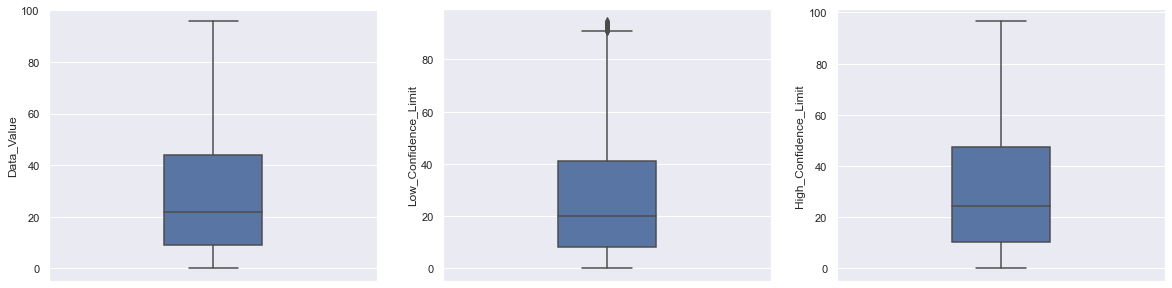

<Figure size 1440x360 with 0 Axes>

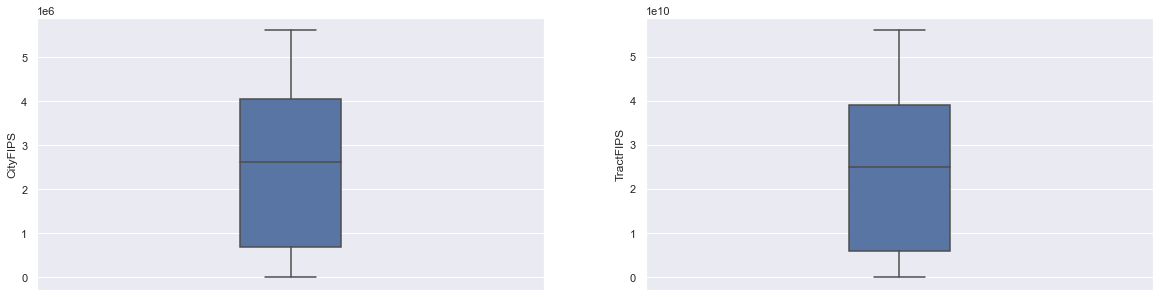

In [78]:
import seaborn as sns
fig,axes=plt.subplots(1,3)

sns.set(rc={'figure.figsize': (20,5)})

x=np.arange(len(data))

sns.set(rc={'figure.figsize': (20,5)})
sns.boxplot(ax=axes[0], data =data_new, y='Data_Value',width=0.3)
sns.boxplot(ax=axes[1], data =data_new,y='Low_Confidence_Limit',width=0.3)
sns.boxplot(ax=axes[2], data =data_new, y='High_Confidence_Limit',width=0.3)
plt.figure()
fig,axes=plt.subplots(1,2)
sns.boxplot(ax=axes[0],data =data_new, y='CityFIPS',width=0.2) #TractFIPS
sns.boxplot(ax=axes[1],data =data_new, y='TractFIPS',width=0.2) #TractFIPS

Checking for outliers on target or label

<AxesSubplot:xlabel='High_Confidence_Limit', ylabel='Short_Question_Text'>

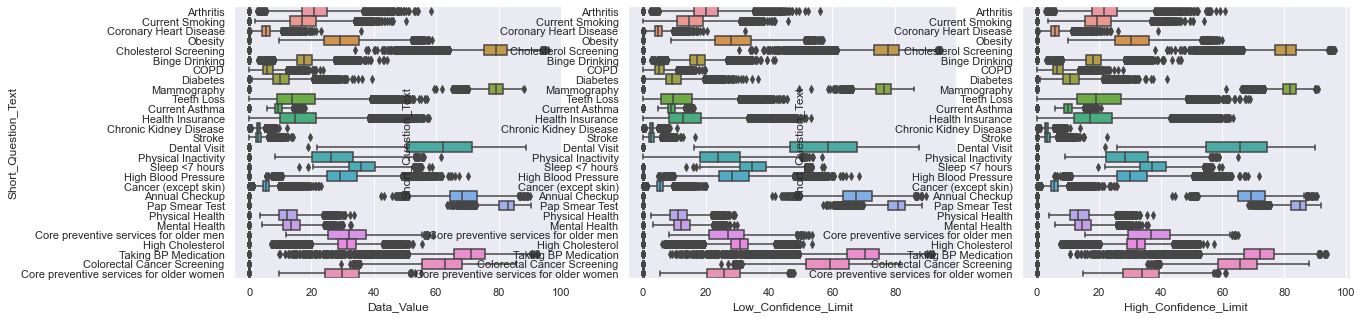

In [79]:

import seaborn as sns
fig,axes=plt.subplots(1,3)

sns.set(rc={'figure.figsize': (20,5)})

x=np.arange(len(data))

sns.set(rc={'figure.figsize': (20,5)})
sns.boxplot(ax=axes[0], data =data_new, x='Data_Value',y='Short_Question_Text',width=1)
sns.boxplot(ax=axes[1], data =data_new,x='Low_Confidence_Limit',y='Short_Question_Text',width=1)
sns.boxplot(ax=axes[2], data =data_new, x='High_Confidence_Limit',y='Short_Question_Text',width=1)


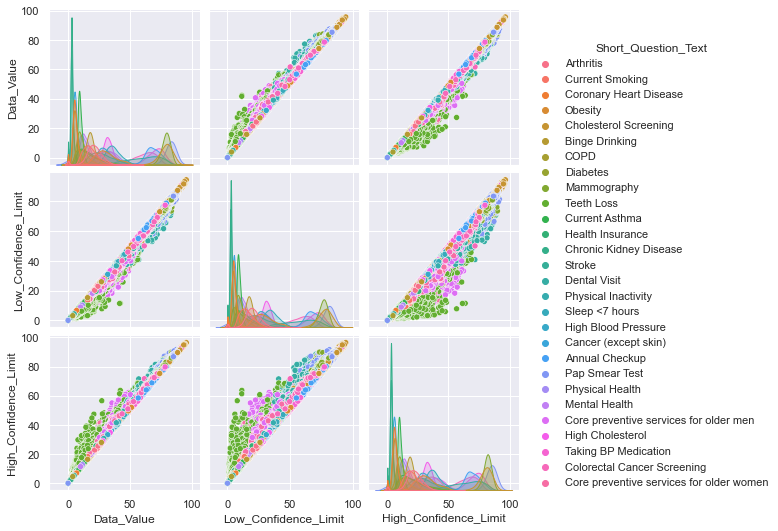

In [24]:
sns.pairplot(data_new, vars=['Data_Value','Low_Confidence_Limit','High_Confidence_Limit'], hue='Short_Question_Text', diag_kind='kde')

plt.show()

In [80]:
data_new.iloc[:,8:].groupby('Short_Question_Text').agg(['mean','median','max'])

Data_Value               \
                                               mean median   max   
Short_Question_Text                                                
Annual Checkup                            67.099083   68.3  90.2   
Arthritis                                 20.854299   20.8  58.4   
Binge Drinking                            17.566459   17.7  44.1   
COPD                                       6.133059    5.7  23.8   
Cancer (except skin)                       5.503772    5.4  22.9   
Cholesterol Screening                     76.592150   79.2  95.7   
Chronic Kidney Disease                     3.011725    2.9  12.3   
Colorectal Cancer Screening               60.458890   62.7  85.7   
Core preventive services for older men    31.348198   31.9  58.9   
Core preventive services for older women  29.526823   29.8  55.1   
Coronary Heart Disease                     5.447759    5.3  35.8   
Current Asthma                             9.466383    9.4  17.8   
Current Smoking                           17.455127   16.9  50.3   
Dental Visit                              59.625791   62.3  88.9   
Diabetes                                  10.495773    9.9  39.5   
Health Insurance                          16.518818   14.7  57.8   
High Blood Pressure                       29.795025   29.2  70.3   
High Cholesterol                          30.468531   31.5  55.4   
Mammography                               77.580304   79.3  88.2   
Mental Health                             13.526760   13.4  32.6   
Obesity                                   29.621806   29.3  58.6   
Pap Smear Test                            74.398520   82.9  90.3   
Physical Health                           12.518003   12.1  33.6   
Physical Inactivity                       26.795487   26.1  61.6   
Sleep <7 hours                            35.669206   35.9  58.7   
Stroke                                     3.118176    2.9  19.5   
Taking BP Medication                      68.564173   71.3  92.8   
Teeth Loss                                15.800392   13.9  57.0   

                                         Low_Confidence_Limit               \
                                                         mean median   max   
Short_Question_Text                                                          
Annual Checkup                                      66.346377   67.6  89.7   
Arthritis                                           19.911060   19.9  56.2   
Binge Drinking                                      16.975067   17.1  41.7   
COPD                                                 5.352082    5.0  19.6   
Cancer (except skin)                                 5.307085    5.3  20.1   
Cholesterol Screening                               74.997638   77.7  94.6   
Chronic Kidney Disease                               2.835562    2.8  10.9   
Colorectal Cancer Screening                         57.194353   59.3  81.4   
Core preventive services for older men              26.472372   26.9  53.6   
Core preventive services for older women            25.480772   25.7  47.9   
Coronary Heart Disease                               4.985369    4.8  32.3   
Current Asthma                                       8.942733    8.9  16.3   
Current Smoking                                     15.153089   14.5  46.1   
Dental Visit                                        56.173836   58.8  87.4   
Diabetes                                             9.843970    9.3  36.4   
Health Insurance                                    14.183219   12.6  53.2   
High Blood Pressure                                 28.794994   28.2  68.6   
High Cholesterol                                    29.693329   30.7  53.6   
Mammography                                         74.787764   76.5  86.0   
Mental Health                                       12.289871   12.1  29.9   
Obesity                                             28.482679   28.0  57.2   
Pap Smear Test                                      72.42199

In [81]:
num_cols=data_new.select_dtypes('number').columns
num_cols

Index(['Year', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'PopulationCount', 'CityFIPS', 'TractFIPS'],
      dtype='object')

In [82]:
skew_limit=0.75
skew_vals=data_new.skew()
skew_vals

Year                      -0.958366
Data_Value                 0.827751
Low_Confidence_Limit       0.882303
High_Confidence_Limit      0.768223
PopulationCount          120.030777
CityFIPS                   0.107327
TractFIPS                  0.133375
dtype: float64

In [83]:
skew_cols=skew_vals[(skew_vals)>skew_limit].sort_values(ascending=False)
print(skew_cols)
data_newl=data_new


PopulationCount          120.030777
Low_Confidence_Limit       0.882303
Data_Value                 0.827751
High_Confidence_Limit      0.768223
dtype: float64


In [84]:
for col in skew_cols.index.values:
    data_new[col]=data_new[col].apply(np.log1p)

In [85]:
data_new.head()

,Year,StateAbbr,CityName,GeographicLevel,DataSource,Category,UniqueID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,GeoLocation,CategoryID,CityFIPS,TractFIPS,Short_Question_Text
0,2017,CA,Hawthorne,Census Tract,BRFSS,Health Outcomes,0632548-06037602504,Crude prevalence,2.747271,2.701361,2.785011,8.391176,"(33.905547923, -118.337332298)",HLTHOUT,632548.0,6.037603e+09,Arthritis
1,2017,CA,Hawthorne,City,BRFSS,Unhealthy Behaviors,0632548,Crude prevalence,2.797281,2.772589,2.827314,11.342066,"(33.914667701, -118.347667728)",UNHBEH,632548.0,0.000000e+00,Current Smoking
2,2017,CA,Hayward,City,BRFSS,Health Outcomes,0633000,Age-adjusted prevalence,1.757858,1.740466,1.757858,11.878866,"(37.6329591551, -122.077051051)",HLTHOUT,633000.0,0.000000e+00,Coronary Heart Disease
3,2017,CA,Hayward,City,BRFSS,Unhealthy Behaviors,0633000,Crude prevalence,3.226844,3.222868,3.234749,11.878866,"(37.6329591551, -122.077051051)",UNHBEH,633000.0,0.000000e+00,Obesity
4,2017,CA,Hemet,City,BRFSS,Prevention,0633182,Age-adjusted prevalence,4.369448,4.364372,4.373238,11.272865,"(33.7352277311, -116.994605005)",PREVENT,633182.0,0.000000e+00,Cholesterol Screening


Converting categorical variables to one hot encoders # Should we consider Ordinal features also instead of Norminal